In [74]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_kmo

# Data Import

In [75]:
df_raw = pd.read_csv("food-texture.csv")
df_raw.head()

,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,B110,16.5,2955,10,23,97
1,B136,17.7,2660,14,9,139
2,B171,16.2,2870,12,17,143
3,B192,16.7,2920,10,31,95
4,B225,16.3,2975,11,26,143


In [76]:
df_raw.columns

Index(['Unnamed: 0', 'Oil', 'Density', 'Crispy', 'Fracture', 'Hardness'], dtype='object')

In [77]:
df = df_raw.copy()

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [78]:
df.shape

(50, 5)

In [79]:
df.describe()

,Oil,Density,Crispy,Fracture,Hardness
count,50.000000,50.00000,50.000000,50.000000,50.000000
mean,17.202000,2857.60000,11.520000,20.860000,128.180000
std,1.592007,124.49998,1.775571,5.466073,31.127578
min,13.700000,2570.00000,7.000000,9.000000,63.000000
25%,16.300000,2772.50000,10.000000,17.000000,107.250000
50%,16.900000,2867.50000,12.000000,21.000000,126.000000
75%,18.100000,2945.00000,13.000000,25.000000,143.750000
max,21.200000,3125.00000,15.000000,33.000000,192.000000


# KMO

A KMO of 0.71 suggests that the data has a high proportion of variance that might be common variance. For our purposes this means that the dataset is well suited to factor analysis so we may proceed.

In [80]:
kmo_all, kmo_model = calculate_kmo(df)

In [81]:
kmo_model

0.7088776872864254

In [82]:
kmo_all

array([0.81755169, 0.70612631, 0.67412963, 0.7879527 , 0.4284536 ])

#

# Varimax Model

In [83]:
fa_v = FactorAnalyzer(6, rotation = "varimax", method = 'minres')
fa_v.fit(df)
loadings_fa_p = fa_v.loadings_

In [84]:
eigen_values, vectors = fa_v.get_eigenvalues()

In [85]:
eigen_values

array([3.03121317, 1.29570576, 0.31004934, 0.24192008, 0.12111165])

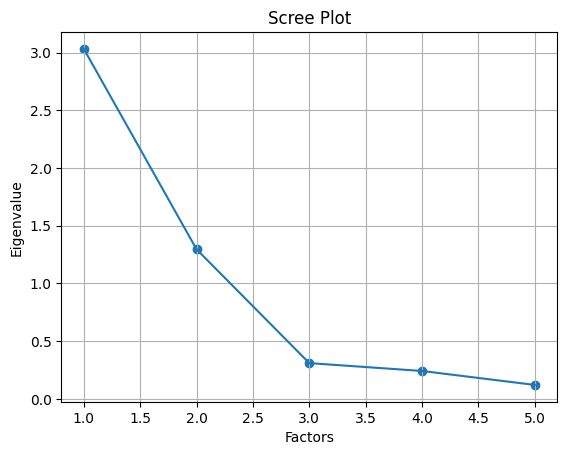

In [86]:
# create scree plot
plt.scatter(range(1, df.shape[1]+1), eigen_values)
plt.plot(range(1, df.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [87]:
# let's make sense of the array of loadings we just got back
loadings = pd.DataFrame(fa_v.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'], index= df.columns)
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
          Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
Oil      -0.840279 -0.014530 -0.042655  0.114431       0.0
Density   0.910076  0.018745  0.029136  0.141643       0.0
Crispy   -0.732696  0.649682 -0.000591 -0.115068       0.0
Fracture  0.632990 -0.584986  0.242168 -0.000188       0.0
Hardness  0.102168  0.749100  0.000762  0.006301       0.0


### Explain Findings  
**Eigenvalues:** The rule of thumb is we're looking for factors with eigenvalues of greater than 1, as this means they explain more variance than a single observed variable. With this in mind, Factors 1 and 2 are the most valuable, with Factor 3 being around 0.3 

**Scree Plot:** The elbow plot has the "rocks lie" at the 3rd factor. Which doesn't make a lot of sense to me. My distaste for scree plots continues.

**Factor Loadings:** Factor 1 seems to be focused on the Oil, Density, and Cripsy and Factor 2 is centered around Fracture, Hardness, and Crispy. The Factor 2 loadings make sense to me, with them all being around the strength/structure of the pastry. For Factor 1, I'm no pastry chef but the amount of Oil affecting the density of the pastry makes sense to me.

**What I would change?:** I would reduce the number of factors to two, given the low value of factors 3 and beyond. 

# Additional Model

In [88]:
fa_ml = FactorAnalyzer(2, rotation = "varimax", method = 'ml')
fa_ml.fit(df)
loadings_fa_ml = fa_ml.loadings_

In [89]:
eigen_values, vectors = fa_ml.get_eigenvalues()

In [90]:
eigen_values

array([3.03121317, 1.29570576, 0.31004934, 0.24192008, 0.12111165])

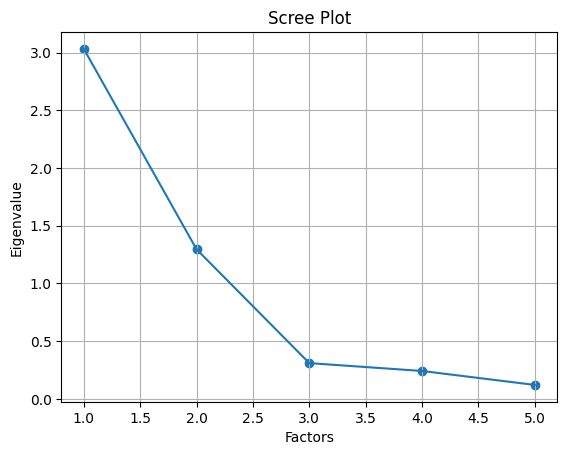

In [91]:
# create scree plot
plt.scatter(range(1, df.shape[1]+1), eigen_values)
plt.plot(range(1, df.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [92]:
# let's make sense of the array of loadings we just got back
loadings = pd.DataFrame(fa_ml.loadings_, columns=['Factor 1', 'Factor 2'], index= df.columns)
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
          Factor 1  Factor 2
Oil      -0.815961 -0.018638
Density   0.918683  0.022287
Crispy   -0.744566  0.635136
Fracture  0.644878 -0.572808
Hardness  0.099313  0.763669


### Explain Findings
**Explain Findings:**  
The Eigenvalues and therefore the scree plot are the same as the previous model. This was confusing to me at first but it makes sense once you find out that those eigenvalues are associated with the original 5 variables from df. 

**How do they differ from the first model:**  
The loadings differ from the previous model given the parameters entered into the factor analysis method. The resulting table is very similar to the Factor loadings in the first model which is not too suprising given the low eigenvalues once you went past the second factor in the scree plot.

# Explain Metrics  
•	Choose one of the two models and obtain your factor loadings, variances, communalities, and uniquenesses. Explain each of these metrics and why you chose to go forward with the model you did. 

### Loadings

In [93]:
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
          Factor 1  Factor 2
Oil      -0.815961 -0.018638
Density   0.918683  0.022287
Crispy   -0.744566  0.635136
Fracture  0.644878 -0.572808
Hardness  0.099313  0.763669


### Variances

In [94]:
fa_ml.get_factor_variance()

(array([2.48987919, 1.31554176]),
 array([0.49797584, 0.26310835]),
 array([0.49797584, 0.76108419]))

In [95]:
fa_ml_variance = pd.DataFrame(fa_ml.get_factor_variance(), columns=['Factor 1', 'Factor 2'],
                           index= ['Variance', 'Proportional Var', 'Cumulative Var'])
print('Factor Variance \n%s' %fa_ml_variance)

Factor Variance 
                  Factor 1  Factor 2
Variance          2.489879  1.315542
Proportional Var  0.497976  0.263108
Cumulative Var    0.497976  0.761084


### Communalities

In [96]:
fa_ml.get_communalities()

array([0.66613965, 0.84447445, 0.95777609, 0.74397672, 0.59305404])

In [97]:
fa_ml_communalities = pd.DataFrame(fa_ml.get_communalities(), index=df.columns, columns=['Communalities'])
print('Factor Communalities \n%s' %fa_ml_communalities)

Factor Communalities 
          Communalities
Oil            0.666140
Density        0.844474
Crispy         0.957776
Fracture       0.743977
Hardness       0.593054


### Uniqueness

In [98]:
fa_ml.get_uniquenesses()

array([0.33386035, 0.15552555, 0.04222391, 0.25602328, 0.40694596])

In [99]:
fa_ml_unique = pd.DataFrame(fa_ml.get_uniquenesses(), index=df.columns, columns=['Uniquenesses'])
print('Factor Uniquenesses \n%s' %fa_ml_unique)

Factor Uniquenesses 
          Uniquenesses
Oil           0.333860
Density       0.155526
Crispy        0.042224
Fracture      0.256023
Hardness      0.406946


I choose the second model.

**Factor Loadings:**  
Factor 1 seems to be focused on the Oil, Density, and Cripsy and Factor 2 is centered around Fracture, Hardness, and Crispy. The Factor 2 loadings make sense to me, with them all being around the strength/structure of the pastry. For Factor 1, I'm no pastry chef but the amount of Oil affecting the density of the pastry makes sense to me.

**Variances:**
Both factors explain 76% of the of the variability in the dataset. Overall this table indicates that both factors explain a lot of the variance in the dataset and that the factor analysis is likely useable for further analysis.

**Communalities:**  
With the lowest communality being at 60%, each of our variables has a significant % of their variance explained by the factors. 

**Uniqueness:**  
Crispyness shares a lot of its variance with the other variables, which makes sense for hardness and fracture. In a professional setting I would rerun this model without crispyness and check the result.

**Why the second model?**  
I prefer the cleaner 2 factor model than the original 6 factor model with 4 out of the 6 factors aren't very useful. 2 factors removes the noise associated with the 4 additional factors and makes the model more interpretable. 

# Overall Conclusions  
•	Discuss your overall conclusions for the model. This includes the number of components you were able to form from your factors. Provide 5-7 sentences.  

Overall I thought this was a fun exercise to implement factor analysis. Running both models helped me better understand the values used to interpret each model and are a small snippet of what using factor analysis in a professional setting would be like. Two factors from these models are useful and capture most of the variance/information contained in the original five variables. I'm considering implementing this approach with some of the clustering analysis that I've been working on at my job.

# Explaining Factor Analysis to my Grandma  



Consider if we were to take a family survey of our preferences for Thanksgiving meals. Our family member's individual flavor preferences would be reflected in the results. Some prefer the savory foods, some prefer the sweet, and no one prefers dry turkey (deep-fried turkey is the way to go!). Factor Analysis would help us find these underlying trends and help us serve a Thanksgiving dinner that would make everyone happy!